# Transmission with O2 absorption with HITRAN

- author Sylvie Dagoret-Campagne
- date : july 24th 2018

In [124]:
import pandas as pd
import numpy as np
import os,sys
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline
from scipy.interpolate import interp1d

In [125]:
PATH_LIBRADTRAN='./librandtran'
PATH_MODTRAN='./modtran'
PATH_MYLSSTSIMS='./lsst_sims'
PATH_HITRAN='./hitran'

In [126]:
sys.path.append(PATH_LIBRADTRAN)
sys.path.append(PATH_MODTRAN)
sys.path.append(PATH_MYLSSTSIMS)
sys.path.append(PATH_HITRAN)

In [127]:
############################################################################
def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(f):
        os.makedirs(f)
#########################################################################

In [128]:
DATADIR='/scratch/dagoret/hitran/data'

In [129]:
ensure_dir(DATADIR)

## Start with hapi

In [130]:
from hapi import *

In [131]:
db_begin(DATADIR)

Using /scratch/dagoret/hitran/data

O2
                     Lines parsed: 1290


### range of O2 data

In [132]:
WLMIN=200.  # nm
WLMAX=1200. # nm

NUMIN=1e7/WLMAX  # cm-1
NUMAX=1e7/WLMIN  # cm-1

In [133]:
fetch_by_ids('O2',[36,37,38],NUMIN,NUMAX)
#fetch('O2',7,1,NUMIN,NUMAX)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: O2
  65536 bytes written to /scratch/dagoret/hitran/data/O2.data
  65536 bytes written to /scratch/dagoret/hitran/data/O2.data
  65536 bytes written to /scratch/dagoret/hitran/data/O2.data
  65536 bytes written to /scratch/dagoret/hitran/data/O2.data
Header written to /scratch/dagoret/hitran/data/O2.header
END DOWNLOAD
                     Lines parsed: 1290
PROCESSED


In [134]:
x,y=getStickXY('O2')

(13000.0, 15000.0)

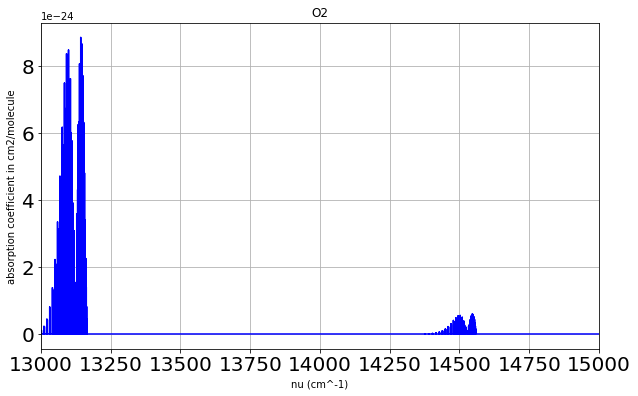

In [135]:
fig = plt.figure(figsize=(10,6))                                                               
ax = fig.add_subplot(1,1,1)  

ax.plot(x,y,'b-')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.grid(True)
ax.set_title("O2")
ax.set_xlabel("nu (cm^-1)")
ax.set_ylabel("absorption coefficient in cm2/molecule")
ax.set_xlim(13000.,15000.)

In [136]:
nu1,coef1 = absorptionCoefficient_Lorentz(SourceTables='O2',OmegaStep=0.01,Environment={'p': 1.,'T': 296})

In [138]:
nu2,coef2 = absorptionCoefficient_HT(SourceTables='O2',OmegaStep=0.01,Environment={'p': 1.0,'T': 296})

./hitran/hapi.py:18572: UserWarning: To get the most up-to-date version please check http://hitran.org/hapi
  warn('To get the most up-to-date version please check http://hitran.org/hapi')


In [144]:
# density of O2
rho_O2=1.000690e+18 # molecules per cm^3

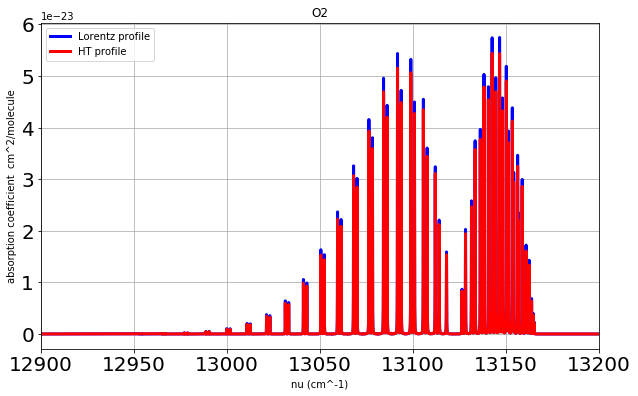

In [145]:
fig = plt.figure(figsize=(10,6))                                                               
ax = fig.add_subplot(1,1,1)  

ax.plot(nu1,coef1,'b-',lw=3,label='Lorentz profile')
ax.plot(nu2,coef2,'r-',lw=3,label='HT profile')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.grid(True)
ax.set_title("O2")
ax.set_xlabel("nu (cm^-1)")
ax.set_ylabel("absorption coefficient  cm^2/molecule")
ax.set_xlim(12900.,13200.)
ax.legend()

In [146]:
#nu,trans = transmittanceSpectrum(nu2,coef2)
nu1,transm1 = transmittanceSpectrum(nu1,coef1*rho_O2,Environment={'l':10000.})
nu2,transm2 = transmittanceSpectrum(nu2,coef2*rho_O2,Environment={'l':10000.})

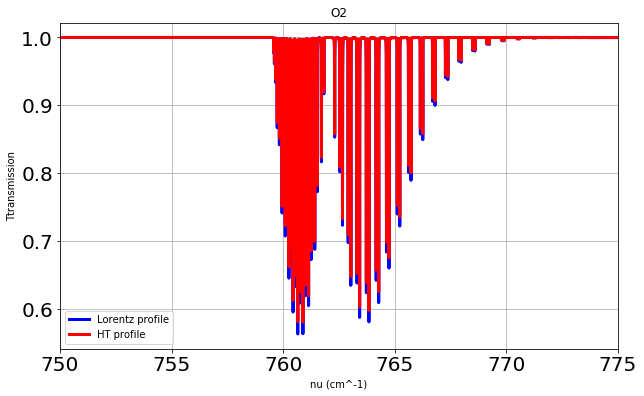

In [147]:
fig = plt.figure(figsize=(10,6))                                                               
ax = fig.add_subplot(1,1,1)  

ax.plot(1e7/nu1,transm1,'b-',lw=3,label='Lorentz profile')
ax.plot(1e7/nu2,transm2,'r-',lw=3,label='HT profile')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.grid(True)
ax.set_title("O2")
ax.set_xlabel("nu (cm^-1)")
ax.set_ylabel('Ttransmission')
ax.set_xlim(750.,775)
ax.legend()



In [152]:
nu_,transm_,i1,i2,slit = convolveSpectrum(nu1,transm1,SlitFunction=SLIT_MICHELSON,Resolution=2.0,AF_wing=2.0)


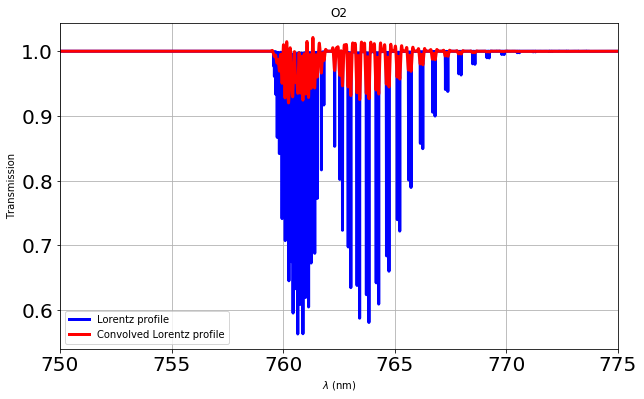

In [153]:
fig = plt.figure(figsize=(10,6))                                                               
ax = fig.add_subplot(1,1,1)  

ax.plot(1e7/nu1,transm1,'b-',lw=3,label='Lorentz profile')
ax.plot(1e7/nu_,transm_,'r-',lw=3,label='Convolved Lorentz profile')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
ax.grid(True)
ax.set_title("O2")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel('Transmission')
ax.set_xlim(750.,775)
ax.legend()